In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("time_to_failure_data/timeToFailure-14_pc_res-c_max=5.00.csv").drop(columns=["failure_time.1"])
#df = df.drop(columns=["failure_time.1"])
df

,runID,failure_time
0,0,4368.0
1,1,4368.0
2,2,4368.0
3,3,4368.0
4,4,4368.0
...,...,...
495,495,4368.0
496,496,4368.0
497,497,4368.0
498,498,4368.0


In [3]:
cmax_vals = [2., 3., 4., 5.] #values of c_max

In [4]:
def getListOfDataFramesForPCRes(pc_res, c_vals):
    '''gets a list containing the dataframes for each ttf simulation as a function of c_max for a specified % resistant'''
    
    df_list = []
    
    for cv in c_vals:
        df = pd.read_csv("time_to_failure_data/timeToFailure-"+str(pc_res)+"_pc_res-c_max="+"{:.2f}".format(cv)+".csv")
        df_list.append(df)
        
    return df_list

In [10]:
def survival_probability(ttf_data):
    '''takes in a dataframe and works out the survival probability as a function of time'''
    histo, bin_edges = np.histogram(ttf_data["failure_time"], bins=100)
    n_vals = len(ttf_data) #get number of runs
    survival_probs = (n_vals-np.cumsum(histo[1:]))/n_vals #get the survival probs (ignoring the 0 bin)
    survival_probs = np.append(1., survival_probs) #add the initial value of 1. for t = 0
    errs = (survival_probs*(1. - survival_probs))/np.sqrt(n_vals)
    #print(n_vals)
    #print(errs)
    #ignore the final value in surv_probs due to exit time being t_max by default
    return bin_edges[:-2], survival_probs[:-1], errs[:-1]

In [14]:
def plot_survival_probs(ttf_df_list, c_vals):
    fig, ax = plt.subplots(figsize=(8,6))
    titleSize = 16
    labelSize = 16
    numbersize = 14
    legendsize = 10
    IDsize=12
    
    for ttf_d, c_val in zip(ttf_df_list, c_vals):
        
    #for ttf, pc_r in zip(collated_ttfs, pc_res_list):
        t, surv_prob, errs = survival_probability(ttf_d)
    #print(surv_prob)
        ax.errorbar(t[3:], surv_prob[3:], yerr=errs[3:], lw=2.2, label =  "$c_{\max} = $"+str(c_val))
        #ax.plot(t, surv_prob)
    
    ax.set_title('Survival probability vs time', fontsize=titleSize)
    ax.set_xlabel('time (hours)', fontsize=labelSize)
    ax.set_ylabel('Survival probability', fontsize=labelSize)
    ax.xaxis.set_tick_params(labelsize=numbersize)
    ax.yaxis.set_tick_params(labelsize=numbersize)
    #ax.set_xlim(0, float(time_1yr))
    ax.set_ylim(0, 1.01)
    plt.legend(fontsize='large')
    plt.show()

In [15]:
ttf_14pcres = getListOfDataFramesForPCRes(14, cmax_vals)
ttf_15pcres = getListOfDataFramesForPCRes(15, cmax_vals)
ttf_16pcres = getListOfDataFramesForPCRes(16, cmax_vals)


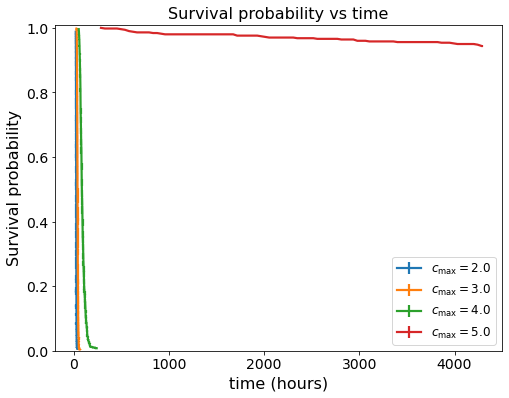

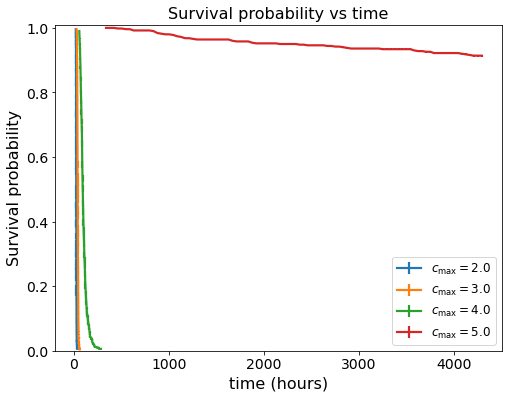

In [16]:
plot_survival_probs(ttf_14pcres, cmax_vals)
plot_survival_probs(ttf_15pcres, cmax_vals)